x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.6555 - loss: 0.9378 - val_accuracy: 0.8372 - val_loss: 0.4389
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8314 - loss: 0.4645 - val_accuracy: 0.8700 - val_loss: 0.3610
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8528 - loss: 0.4016 - val_accuracy: 0.8765 - val_loss: 0.3283
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8636 - loss: 0.3669 - val_accuracy: 0.8890 - val_loss: 0.2991
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8744 - loss: 0.3466 - val_accuracy: 0.8929 - val_loss: 0.2887
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8797 - loss: 0.3257 - val_accuracy: 0.8937 - val_loss: 0.2951
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8857 - loss: 0.3084 - val_accuracy: 0.8992 -

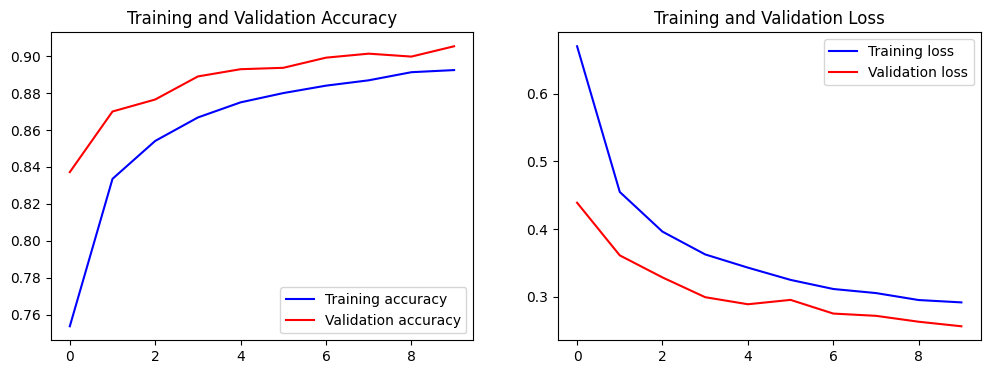

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


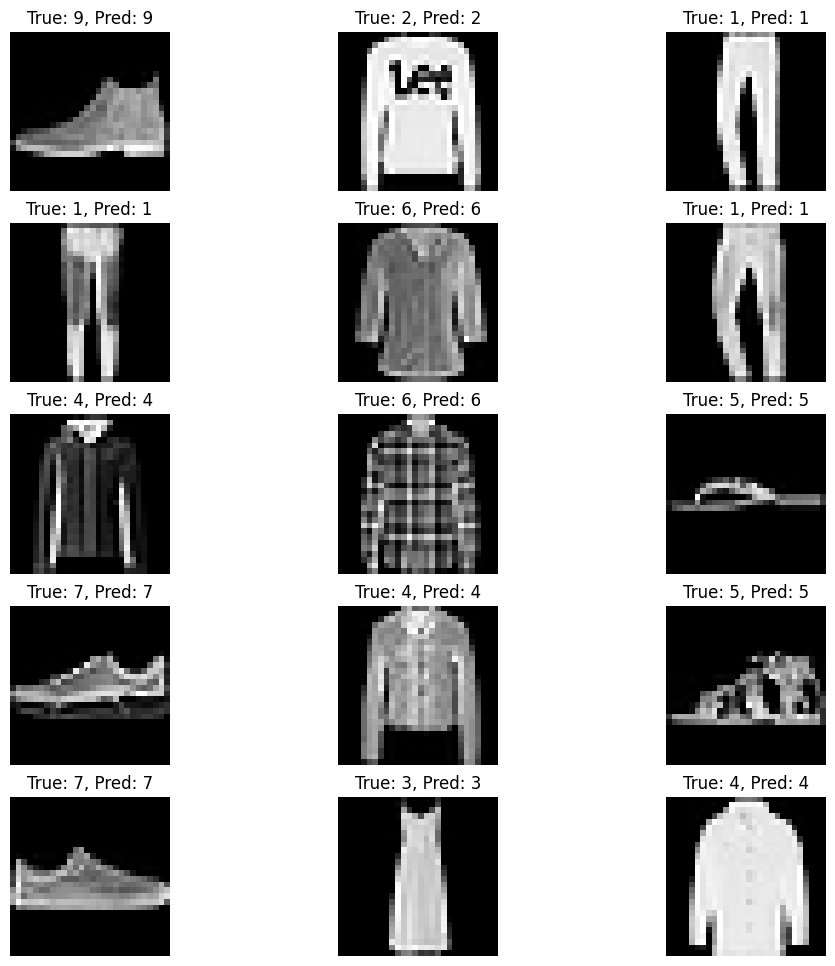

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Display the shape of the dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to include a channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_accuracy)

# Plot training & validation accuracy and loss values
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(history)

# Make predictions on test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display some predictions with their true labels
def display_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 12))
    for i in range(15):
        plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Pred: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

display_predictions(x_test[:15], y_test[:15], predicted_classes[:15])
